## Data Dictionary

## import important libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import normalize
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler


In [2]:
#reading the dataset
df=pd.read_csv("first inten project.csv")

In [3]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


### data exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

no nan values

In [5]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [6]:
#check duplicates
df.duplicated().sum()

0

no duplicated values

### data cleaning

In [7]:
df

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


	number of adults column

In [8]:
df["number of adults"].unique()

array([1, 2, 3, 0, 4], dtype=int64)

In [9]:
df["number of adults"].value_counts()

2    26110
1     7702
3     2318
0      139
4       16
Name: number of adults, dtype: int64

In [10]:
df[df["number of adults"]==0]

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
32,INN00033,0,2,0,3,Meal Plan 1,0,Room_Type 2,56,Online,0,0,0,82.44,1,12/7/2018,Not_Canceled
287,INN00288,0,2,2,2,Meal Plan 1,0,Room_Type 1,68,Online,0,0,0,108.38,1,4/24/2018,Canceled
653,INN00654,0,2,1,2,Meal Plan 1,0,Room_Type 2,78,Online,0,0,0,115.68,1,8/19/2018,Not_Canceled
937,INN00938,0,2,0,3,Meal Plan 1,0,Room_Type 2,40,Online,0,0,0,6.67,1,1/14/2018,Not_Canceled
954,INN00955,0,2,1,1,Meal Plan 1,0,Room_Type 2,92,Online,0,0,0,81.50,2,10/29/2018,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34720,INN34721,0,2,0,3,Meal Plan 1,0,Room_Type 2,76,Online,0,0,0,127.38,3,9/21/2018,Not_Canceled
34730,INN34731,0,2,1,1,Meal Plan 1,0,Room_Type 2,178,Online,0,0,0,88.77,0,8/27/2018,Canceled
34890,INN34891,0,2,2,2,Meal Plan 1,0,Room_Type 2,31,Online,0,0,0,124.25,2,9/16/2018,Not_Canceled
35691,INN35692,0,2,2,1,Meal Plan 1,0,Room_Type 2,75,Online,0,0,0,78.00,0,3/19/2018,Canceled


In [11]:
df[df["number of adults"]==0]["booking status"].value_counts()

Not_Canceled    95
Canceled        44
Name: booking status, dtype: int64

its not logical that children can book in hotels alone and complete there reservation so i will drop all zero

In [12]:
#drop 0
df.drop(df[df['number of adults'] == 0].index,inplace=True)

In [13]:
df["number of adults"].value_counts()

2    26110
1     7702
3     2318
4       16
Name: number of adults, dtype: int64

    number of children

In [14]:
df["number of children"].unique()

array([ 1,  0,  2,  3, 10,  9], dtype=int64)

In [15]:
df["number of children"].value_counts()

0     33583
1      1621
2       925
3        14
9         2
10        1
Name: number of children, dtype: int64

I will drop 9 and 10 beacuse there count is vary low and logicaly mey be not accepted and they outliers

In [16]:
#drop 9 and 10
df.drop(df[df['number of children'] == 10].index,inplace=True)
df.drop(df[df['number of children'] == 9].index,inplace=True)

In [17]:
df["number of children"].value_counts()

0    33583
1     1621
2      925
3       14
Name: number of children, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36143 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36143 non-null  object 
 1   number of adults          36143 non-null  int64  
 2   number of children        36143 non-null  int64  
 3   number of weekend nights  36143 non-null  int64  
 4   number of week nights     36143 non-null  int64  
 5   type of meal              36143 non-null  object 
 6   car parking space         36143 non-null  int64  
 7   room type                 36143 non-null  object 
 8   lead time                 36143 non-null  int64  
 9   market segment type       36143 non-null  object 
 10  repeated                  36143 non-null  int64  
 11  P-C                       36143 non-null  int64  
 12  P-not-C                   36143 non-null  int64  
 13  average price             36143 non-null  float64
 14  specia

    number of weekend nights

In [19]:
df["number of weekend nights"].unique()

array([2, 1, 0, 4, 3, 6, 5, 7], dtype=int64)

In [20]:
df["number of weekend nights"].value_counts()

0    16815
1     9970
2     9022
3      152
4      129
5       34
6       20
7        1
Name: number of weekend nights, dtype: int64

In [21]:
#i will drop 7 because it is just 1 
df.drop(df[df['number of weekend nights'] == 7].index,inplace=True)

    number of week nights

In [22]:
df["number of week nights"].unique()

array([ 5,  3,  2,  4,  0,  1, 10,  6, 11,  7, 15,  9, 13,  8, 14, 12, 17,
       16], dtype=int64)

In [23]:
df["number of week nights"].value_counts()

2     11408
1      9452
3      7799
4      2980
0      2383
5      1610
6       189
7       113
8        62
10       61
9        33
11       17
15       10
12        9
14        7
13        5
17        2
16        2
Name: number of week nights, dtype: int64

In [24]:
# I will drop [16,17,13,14]
for value in [16,17,13,14]:
    df.drop(df[df["number of week nights"]==value].index,inplace=True)

    type of meal

In [25]:
df["type of meal"].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [26]:
df["type of meal"].value_counts()

Meal Plan 1     27689
Not Selected     5128
Meal Plan 2      3304
Meal Plan 3         5
Name: type of meal, dtype: int64

In [27]:
#i will drop "Meal Plan 3" beacuse it just repeated 5 times
df.drop(df[df["type of meal"]=="Meal Plan 3"].index,inplace=True)

In [28]:
df["type of meal"].value_counts()

Meal Plan 1     27689
Not Selected     5128
Meal Plan 2      3304
Name: type of meal, dtype: int64

    car parking space

In [29]:
df["car parking space"].unique()

array([0, 1], dtype=int64)

In [30]:
df["car parking space"].value_counts()

0    34999
1     1122
Name: car parking space, dtype: int64

    room type

In [31]:
df["room type"].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 6', 'Room_Type 5',
       'Room_Type 2', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [32]:
df["room type"].value_counts()

Room_Type 1    28120
Room_Type 4     6054
Room_Type 6      964
Room_Type 2      558
Room_Type 5      264
Room_Type 7      154
Room_Type 3        7
Name: room type, dtype: int64

In [33]:
#i will drop "Room_Type 3" beacuse it just repeated 7 times
df.drop(df[df["room type"]=="Room_Type 3"].index,inplace=True)

In [34]:
df["room type"].value_counts()

Room_Type 1    28120
Room_Type 4     6054
Room_Type 6      964
Room_Type 2      558
Room_Type 5      264
Room_Type 7      154
Name: room type, dtype: int64

    lead time

In [35]:
df["lead time"].nunique()

352

    market segment type

In [36]:
df["market segment type"].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [37]:
df["market segment type"].value_counts()

Online           23069
Offline          10526
Corporate         2013
Complementary      381
Aviation           125
Name: market segment type, dtype: int64

    repeated

In [38]:
df["repeated"].unique()

array([0, 1], dtype=int64)

In [39]:
df["repeated"].value_counts()

0    35185
1      929
Name: repeated, dtype: int64

    P-C

In [40]:
df["P-C"].unique()

array([ 0,  3,  1,  2, 11,  4,  5, 13,  6], dtype=int64)

In [41]:
df["P-C"].value_counts()

0     35776
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: P-C, dtype: int64

In [42]:
#drop 6 and 13
df.drop(df[df["P-C"]==6].index,inplace=True)
df.drop(df[df["P-C"]==13].index,inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36109 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36109 non-null  object 
 1   number of adults          36109 non-null  int64  
 2   number of children        36109 non-null  int64  
 3   number of weekend nights  36109 non-null  int64  
 4   number of week nights     36109 non-null  int64  
 5   type of meal              36109 non-null  object 
 6   car parking space         36109 non-null  int64  
 7   room type                 36109 non-null  object 
 8   lead time                 36109 non-null  int64  
 9   market segment type       36109 non-null  object 
 10  repeated                  36109 non-null  int64  
 11  P-C                       36109 non-null  int64  
 12  P-not-C                   36109 non-null  int64  
 13  average price             36109 non-null  float64
 14  specia

    P-not-C

In [44]:
df["P-not-C"].unique()

array([ 0,  5,  1,  3,  4, 12, 19,  2, 15, 17,  7, 20, 16, 50, 13,  6, 14,
       34, 18,  8, 10, 23, 11, 49, 47, 53,  9, 33, 22, 24, 52, 21, 48, 28,
       39, 25, 31, 38, 26, 51, 42, 37, 35, 56, 44, 27, 32, 55, 45, 30, 57,
       46, 54, 43, 41, 29, 40, 36], dtype=int64)

In [45]:
df["P-not-C"].value_counts()

0     35303
1       224
2       111
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
26        2
32        2
29        2
48        2
28        2
30        2
31        2
55        1
45        1
57        1
53        1
46        1
50        1
43        1
41        1
40        1
54        1
35        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: P-not-C, dtype: int64

    average price

In [46]:
df.columns = df.columns.str.strip()

In [47]:
df["average price"].nunique()

3909

    special requests

In [48]:
df["special requests"].unique()

array([0, 1, 3, 2, 4, 5], dtype=int64)

In [49]:
df["special requests"].value_counts()

0    19711
1    11303
2     4341
3      670
4       76
5        8
Name: special requests, dtype: int64

In [50]:
#drop 5
df.drop(df[df["special requests"]==5].index,inplace=True)

    date of reservation 

In [51]:
#Convert 'date of reservation' column to datetime
df['date of reservation'] = pd.to_datetime(df['date of reservation'],errors='coerce')
# Drop rows with NaN in the 'date of reservation' column
df.dropna(subset=['date of reservation'], inplace=True)


In [52]:
#Extract day , month and year into new columns
df['day of reservation']=df['date of reservation'].dt.day
df['month of reservation']=df['date of reservation'].dt.month
df['year of reservation']=df['date of reservation'].dt.year


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36064 entries, 0 to 36284
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Booking_ID                36064 non-null  object        
 1   number of adults          36064 non-null  int64         
 2   number of children        36064 non-null  int64         
 3   number of weekend nights  36064 non-null  int64         
 4   number of week nights     36064 non-null  int64         
 5   type of meal              36064 non-null  object        
 6   car parking space         36064 non-null  int64         
 7   room type                 36064 non-null  object        
 8   lead time                 36064 non-null  int64         
 9   market segment type       36064 non-null  object        
 10  repeated                  36064 non-null  int64         
 11  P-C                       36064 non-null  int64         
 12  P-not-C           

    booking status

In [56]:
df["booking status"].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [57]:
df["booking status"].value_counts()

Not_Canceled    24247
Canceled        11817
Name: booking status, dtype: int64

## EDA

<font color="blue">Univariate Analysis.</font>


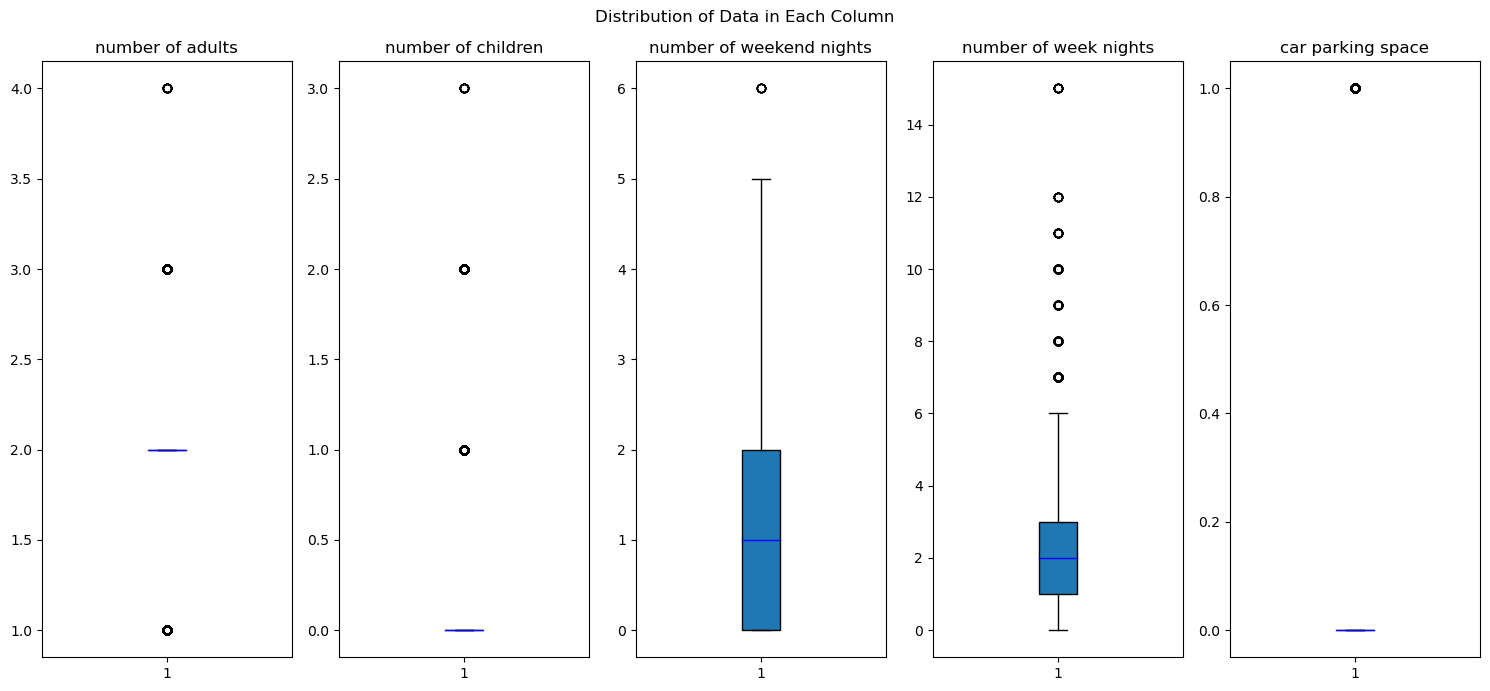

In [58]:
#boxplot to check outliers
data= ["number of adults","number of children","number of weekend nights","number of week nights","car parking space"]
fig, axs = plt.subplots(1, len(data), figsize=(15, 7))  

# Plot each column in a separate subplot
for i, column in enumerate(data):
    axs[i].boxplot(df[column], vert=True, patch_artist=True, medianprops={'color': 'blue'})
    axs[i].set_title(column)
fig.suptitle("Distribution of Data in Each Column")
plt.tight_layout()
plt.show()


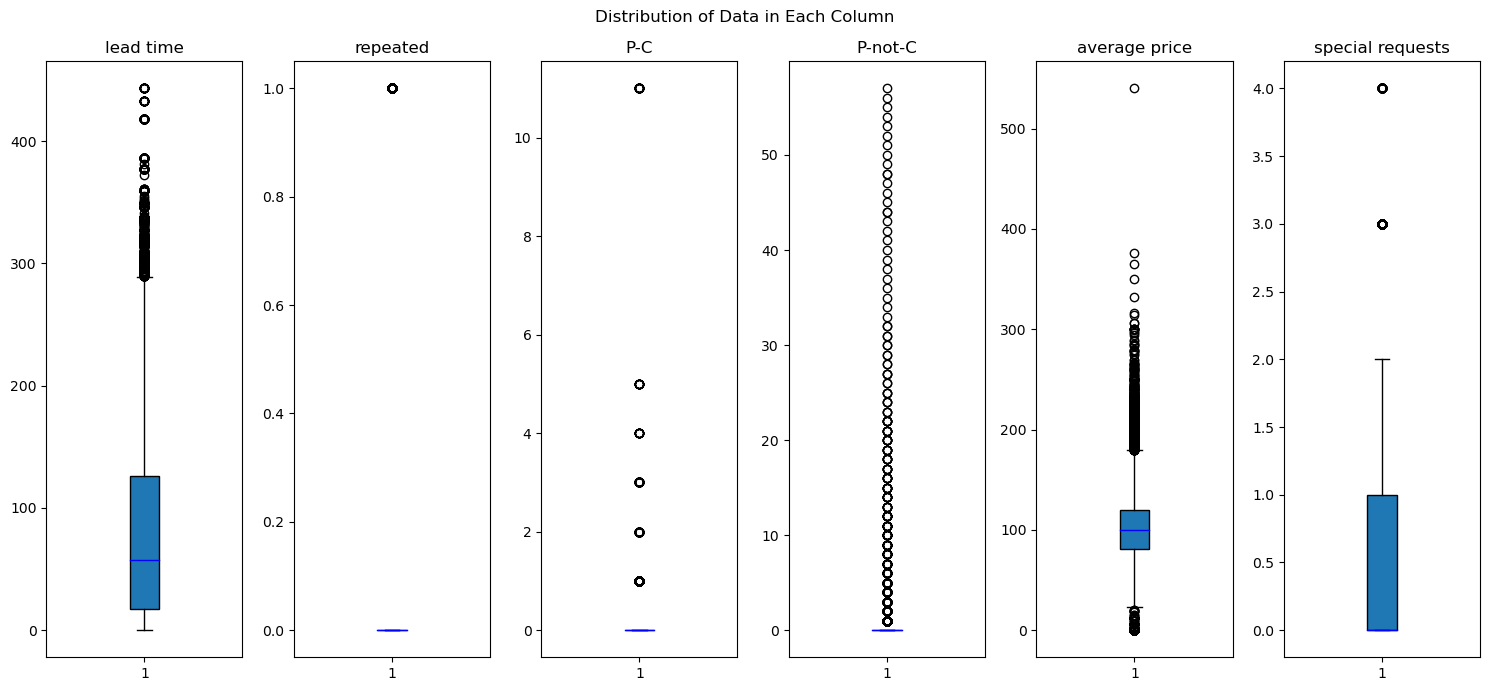

In [59]:
#boxplot to check outliers
data=["lead time","repeated","P-C","P-not-C","average price","special requests"]
# Create a figure and define the number of subplots
fig, axs = plt.subplots(1, len(data), figsize=(15, 7))  

# Plot each column in a separate subplot
for i, column in enumerate(data):
    axs[i].boxplot(df[column], vert=True, patch_artist=True, medianprops={'color': 'blue'})
    axs[i].set_title(column)
fig.suptitle("Distribution of Data in Each Column")
plt.tight_layout()
plt.show()

<code style="color: green;">some of columns have outliers so i will fix it later in the notebook.</code>


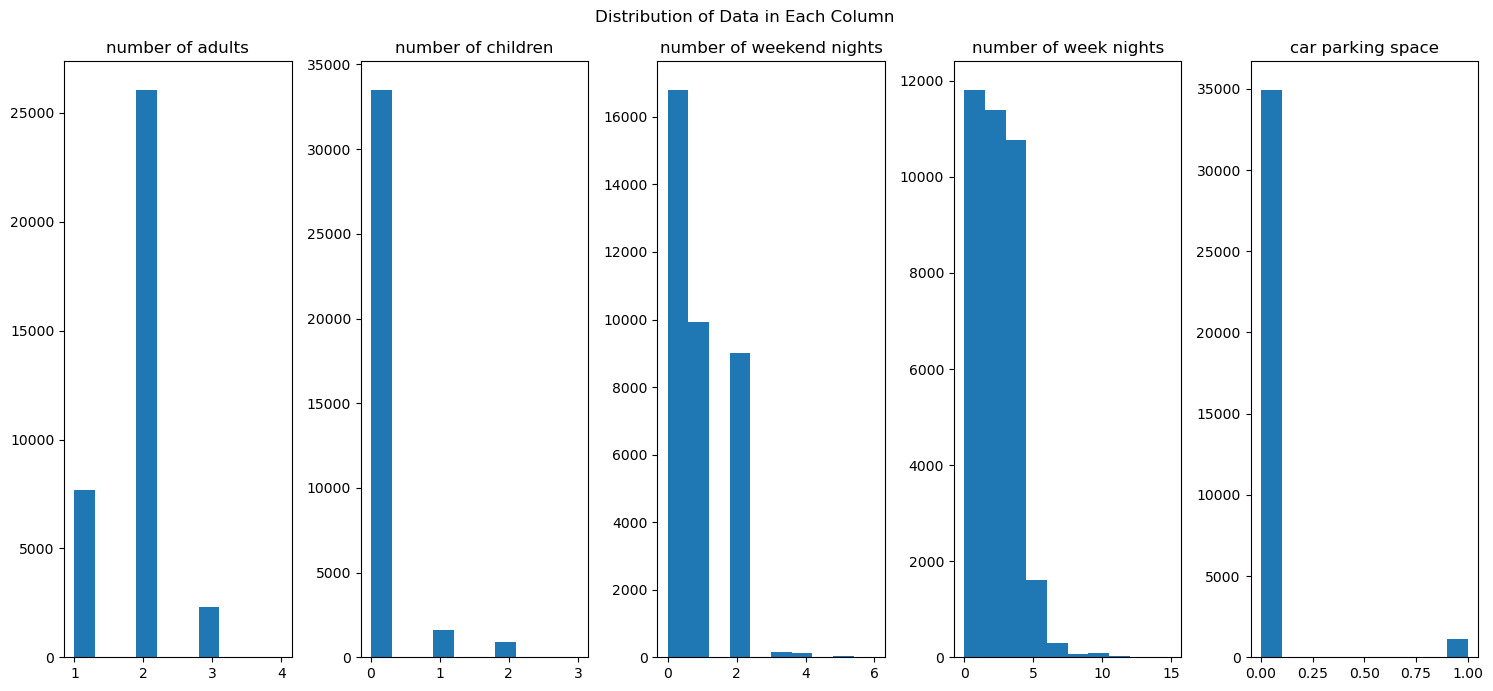

In [60]:
#histogram to see distribution for numerical data
data= ["number of adults","number of children","number of weekend nights","number of week nights","car parking space"]
fig, axs = plt.subplots(1, len(data), figsize=(15, 7))  

# Plot each column in a separate subplot
for i, column in enumerate(data):
    axs[i].hist(df[column], )
    axs[i].set_title(column)
fig.suptitle("Distribution of Data in Each Column")
plt.tight_layout()
plt.show()

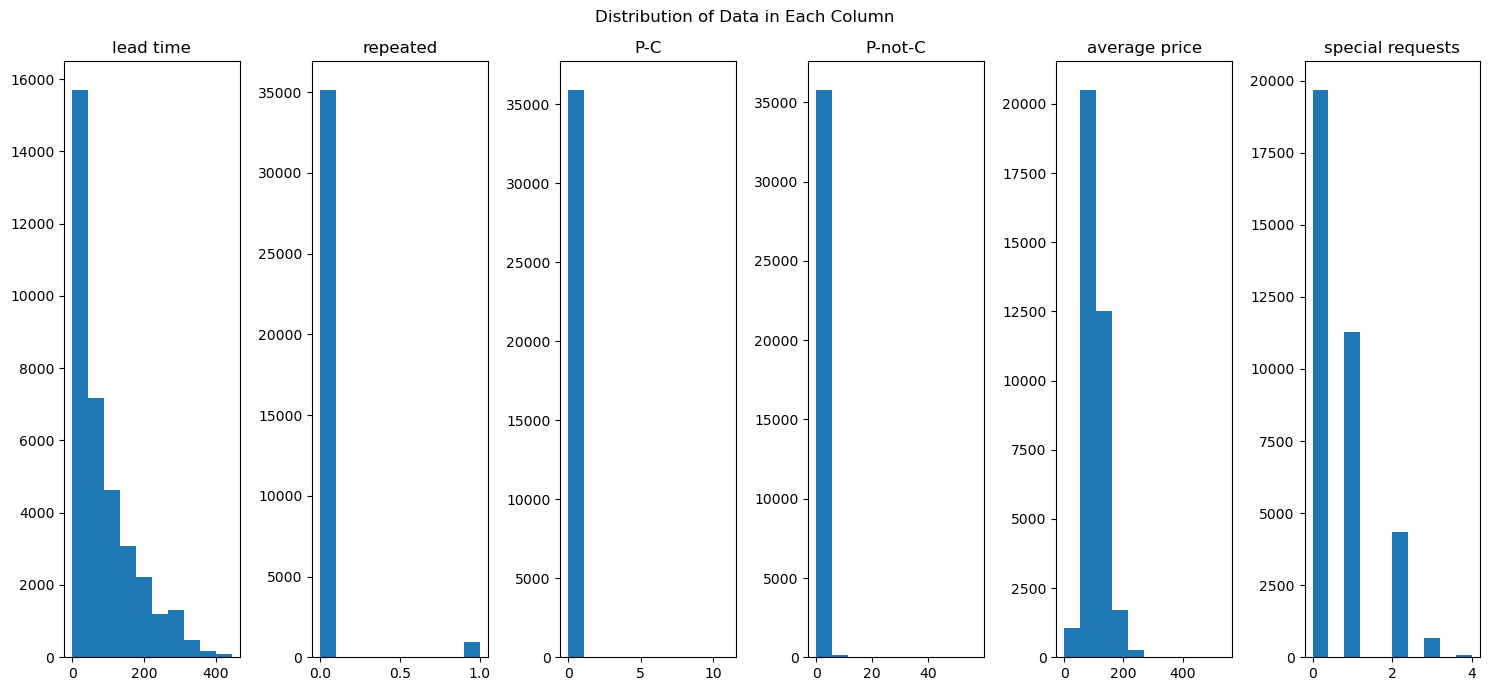

In [61]:
#histogram to see distribution for numerical data
data=["lead time","repeated","P-C","P-not-C","average price","special requests"]
# Create a figure and define the number of subplots
fig, axs = plt.subplots(1, len(data), figsize=(15, 7))  

# Plot each column in a separate subplot
for i, column in enumerate(data):
    axs[i].hist(df[column])
    axs[i].set_title(column)
fig.suptitle("Distribution of Data in Each Column")
plt.tight_layout()
plt.show()

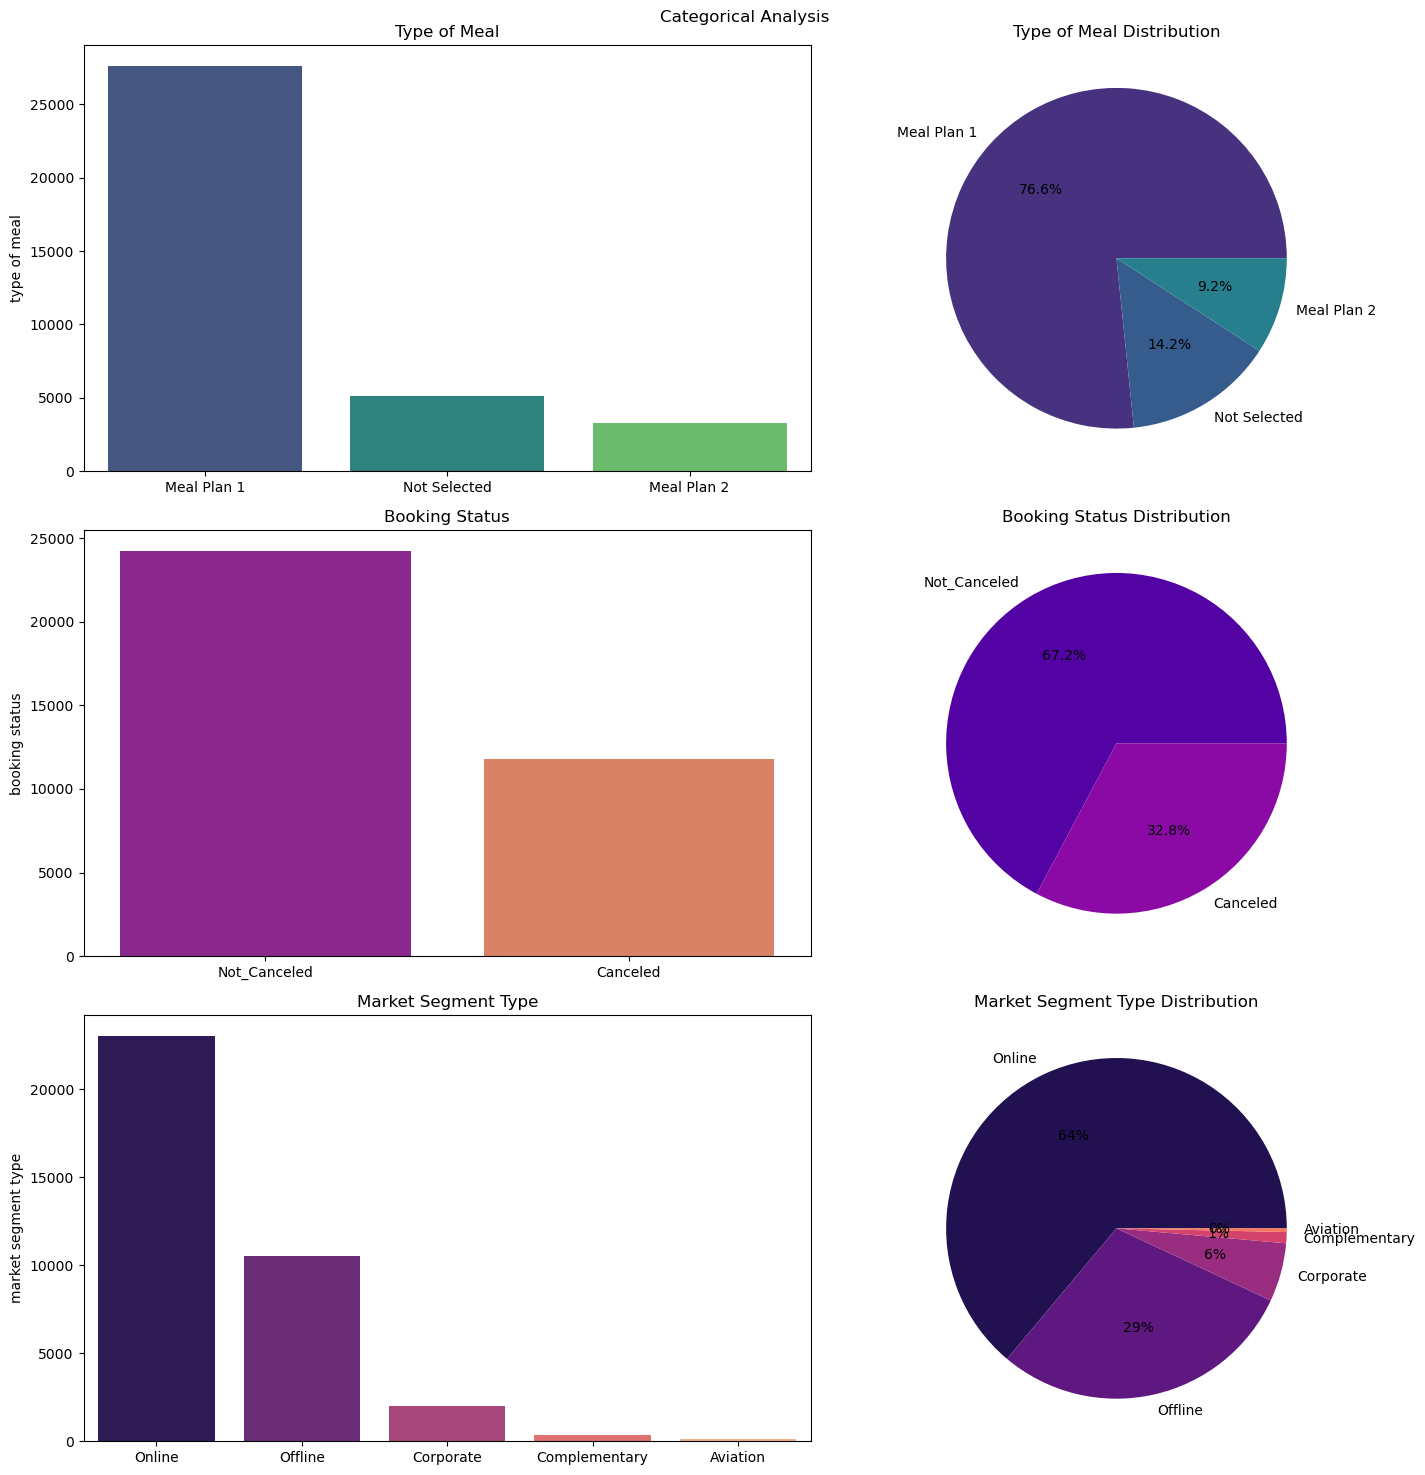

In [62]:
#categorical data analysis
# Create a 3x2 grid of subplots
fig, ax = plt.subplots(3, 2, figsize=(15, 15))

type_of_meal_counts = df["type of meal"].value_counts()
# Create a bar plot of type of meal with a custom color palette
sns.barplot(x=type_of_meal_counts.index, y=type_of_meal_counts, palette="viridis", ax=ax[0, 0])
ax[0, 0].set_title('Type of Meal')

# Create a pie chart of type of meal counts on the second subplot with a custom color palette
ax[0, 1].pie(type_of_meal_counts, labels=type_of_meal_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis"))
ax[0, 1].set_title('Type of Meal Distribution')

booking_status_counts = df["booking status"].value_counts()
# Create a bar plot of booking status with a custom color palette
sns.barplot(x=booking_status_counts.index, y=booking_status_counts, palette="plasma", ax=ax[1, 0])
ax[1, 0].set_title('Booking Status')

# Create a pie chart of booking status on the fourth subplot with a custom color palette
ax[1, 1].pie(booking_status_counts, labels=booking_status_counts.index, autopct='%1.1f%%', colors=sns.color_palette("plasma"))
ax[1, 1].set_title('Booking Status Distribution')

type_of_market_counts = df["market segment type"].value_counts()
# Create a bar plot of market segment type with a custom color palette
sns.barplot(x=type_of_market_counts.index, y=type_of_market_counts, palette="magma", ax=ax[2, 0])
ax[2, 0].set_title('Market Segment Type')

# Create a pie chart of market segment type on the last subplot with a custom color palette
ax[2, 1].pie(type_of_market_counts, labels=type_of_market_counts.index, autopct='%1.0f%%', colors=sns.color_palette("magma"))
ax[2, 1].set_title('Market Segment Type Distribution')

# Add a title to the Figure
fig.suptitle('Categorical Analysis')

# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Show the figure
plt.show()


<code style="color: green;">Meal Plan 1 was preferred by the majority, with a percentage of 76.6%.</code><br>
<code style="color: blue;">Most people complete their reservations.</code><br>
<code style="color: green;">The majority of people make their bookings online.</code><br>



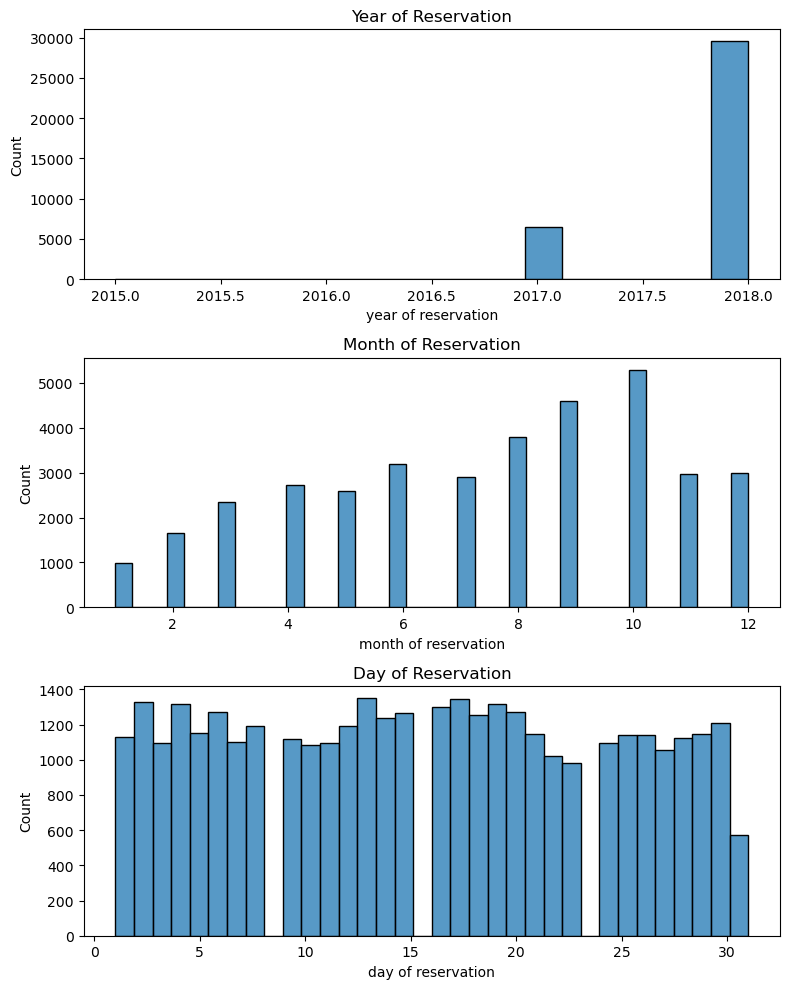

In [63]:
# Create a figure with subplots
fig, ax = plt.subplots(3, 1, figsize=(8, 10))

# Create a histogram to show the distribution of the year of reservation
sns.histplot(df["year of reservation"], ax=ax[0])
ax[0].set_title('Year of Reservation')

# Create a histogram to show the distribution of the month of reservation
sns.histplot(df["month of reservation"], ax=ax[1])
ax[1].set_title('Month of Reservation')

# Create a histogram to show the distribution of the day of reservation
sns.histplot(df["day of reservation"], ax=ax[2])
ax[2].set_title('Day of Reservation')

# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Show the plots
plt.show()


<code style="color: green;">Some days had no bookings, and October recorded the highest number of reservations.</code>


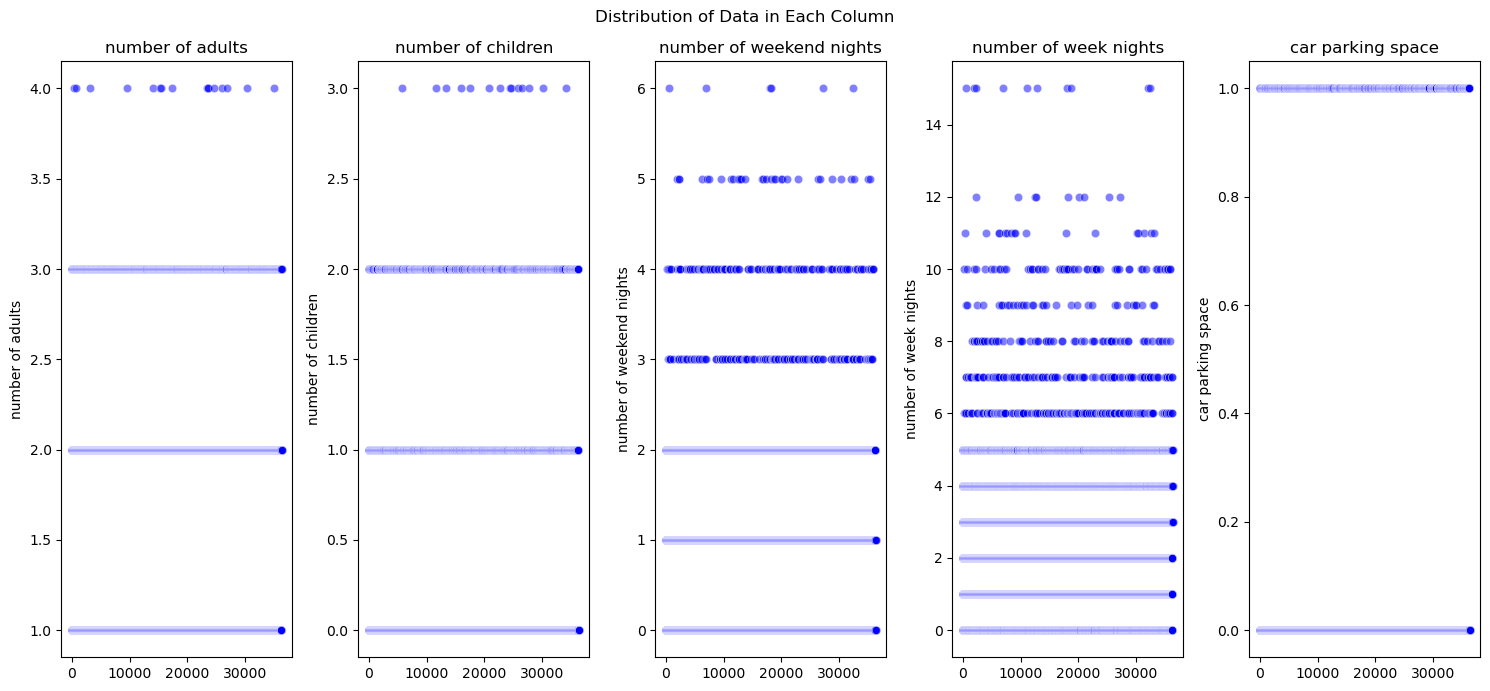

In [64]:
#Create a scatter to show the distribution of all columns
# Define the list of columns to create scatter plots for
data = ["number of adults", "number of children", "number of weekend nights", "number of week nights", "car parking space"]

fig, axs = plt.subplots(1, len(data), figsize=(15, 7))

# Plot each column in a separate subplot
for i, column in enumerate(data):
    sns.scatterplot(data=df, x=df.index, y=column, ax=axs[i], color='blue', alpha=0.5)
    axs[i].set_title(column)
# Add a title to the Figure
fig.suptitle("Distribution of Data in Each Column")
plt.tight_layout()
plt.show()


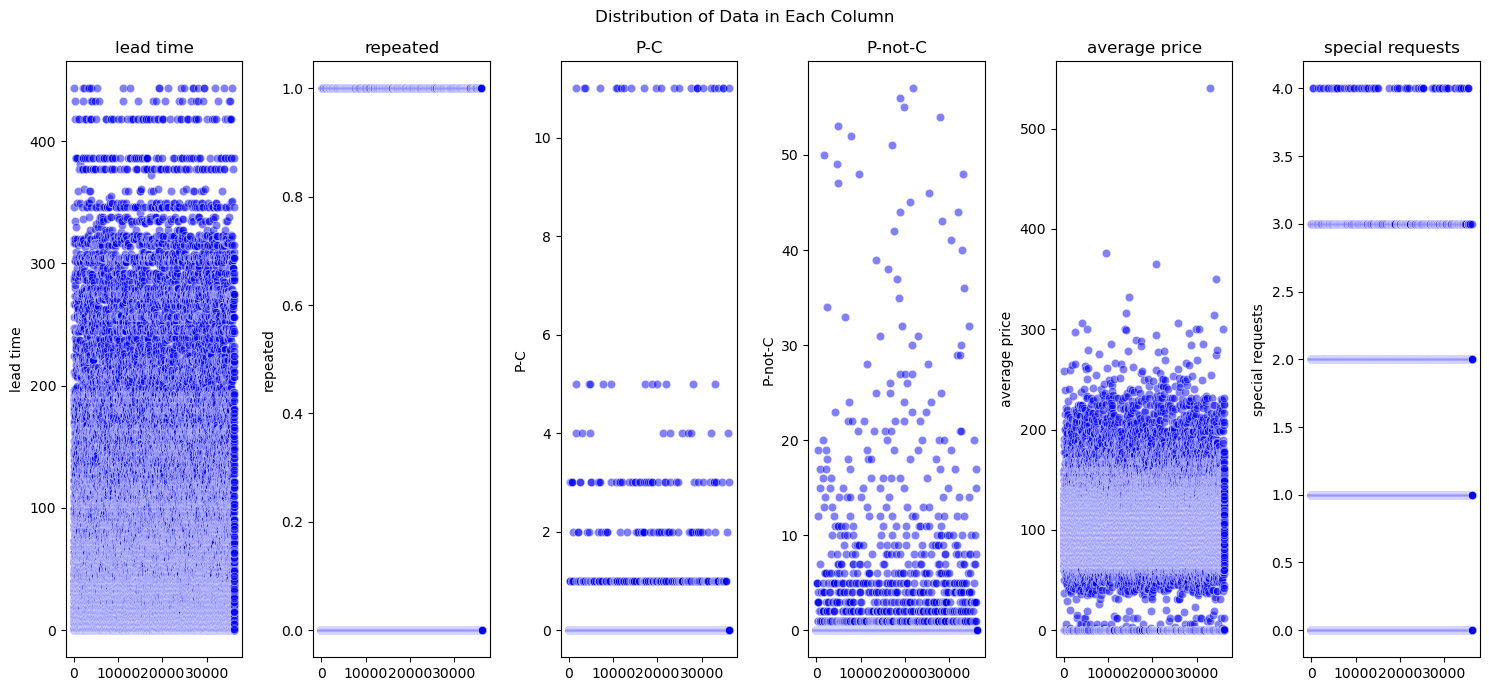

In [65]:
#Create a scatter to show the distribution of all columns
#Define the list of columns to create scatter plots for
data=["lead time","repeated","P-C","P-not-C","average price","special requests"]

fig, axs = plt.subplots(1, len(data), figsize=(15, 7))

# Plot each column in a separate subplot
for i, column in enumerate(data):
    sns.scatterplot(data=df, x=df.index, y=column, ax=axs[i], color='blue', alpha=0.5)
    axs[i].set_title(column)

fig.suptitle("Distribution of Data in Each Column")
plt.tight_layout()
plt.show()


<code style="color: green;">Most of the columns contain discrete values or specific numbers, rather than continuous data.</code>


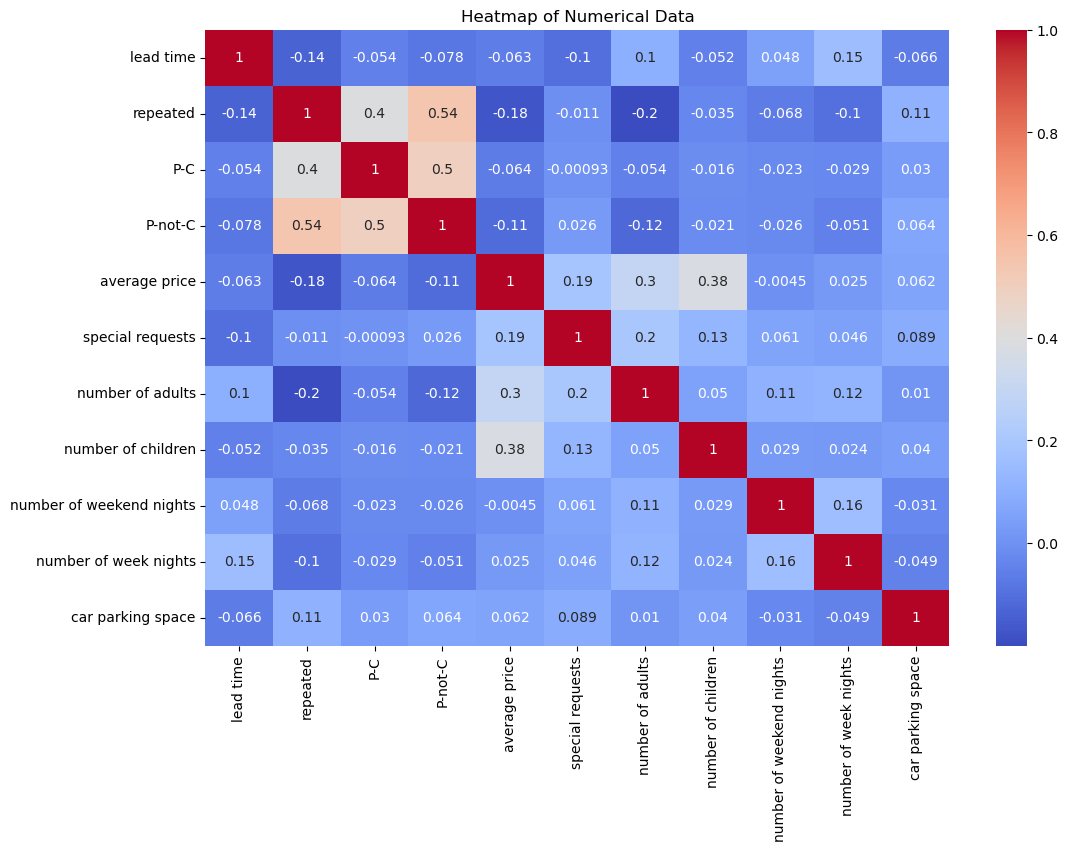

In [66]:
#heatmap to check corr
numercal_data=["lead time","repeated","P-C","P-not-C","average price","special requests","number of adults", "number of children", "number of weekend nights", "number of week nights", "car parking space"]
plt.figure(figsize=(12, 8))  # Adjust the figure size if needed
sns.heatmap(df[numercal_data].corr(), annot=True, cmap="coolwarm")

# Set the plot title
plt.title("Heatmap of Numerical Data")

# Display the heatmap
plt.show()

<code style="color: green;">In the figure, the correlation between columns is weak.</code><br>


### 
<font color="blue">Bivariate Analysis.</font>


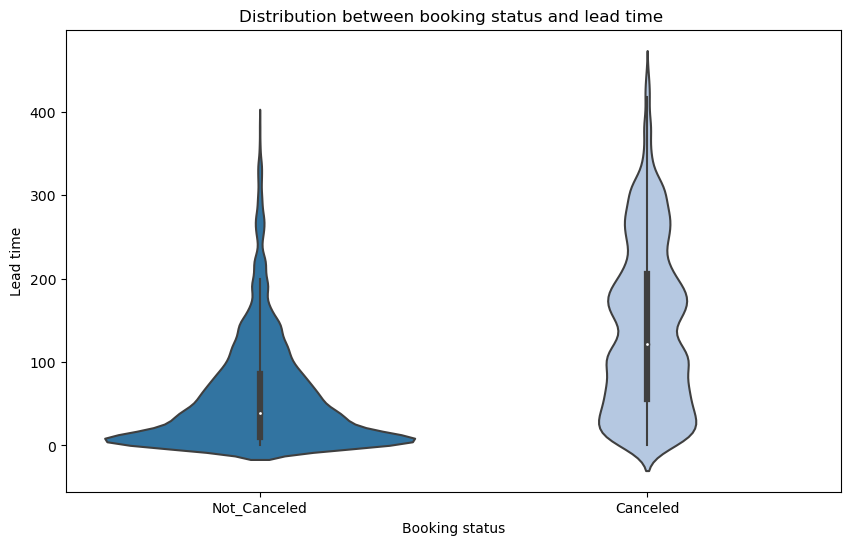

In [67]:
#A Violin plot for showing the Distribution between lead and time booking status
plt.figure(figsize=(10, 6))
sns.set_palette("tab20")
sns.violinplot(data=df, x="booking status", y="lead time")
plt.title("Distribution between booking status and lead time ")
plt.xlabel("Booking status")
plt.ylabel("Lead time")
plt.show()

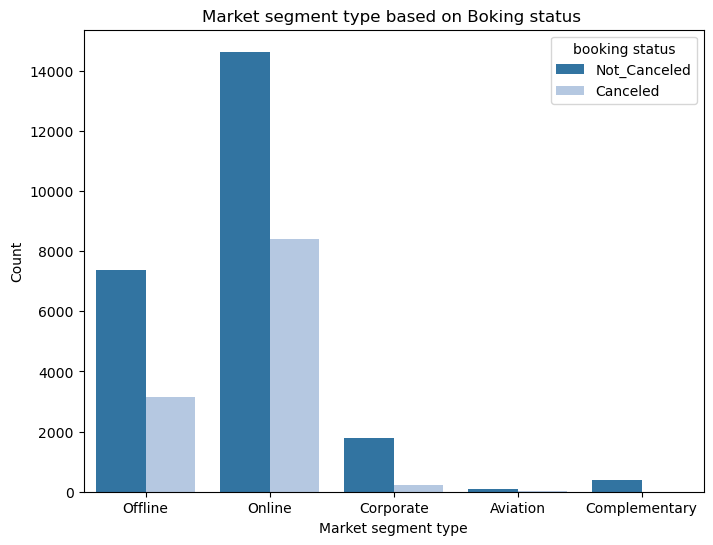

In [68]:
#A count plot for showing the relationship between market segment type and booking status
plt.figure(figsize=(8, 6))
sns.set_palette("tab20")
sns.countplot(data=df, x=df["market segment type"], hue=df["booking status"])
plt.title("Market segment type based on Boking status ")
plt.xlabel("Market segment type")
plt.ylabel("Count")
plt.show()

<code style="color: green;">Whether online or offline, most people have completed the reservation.
</code><br>


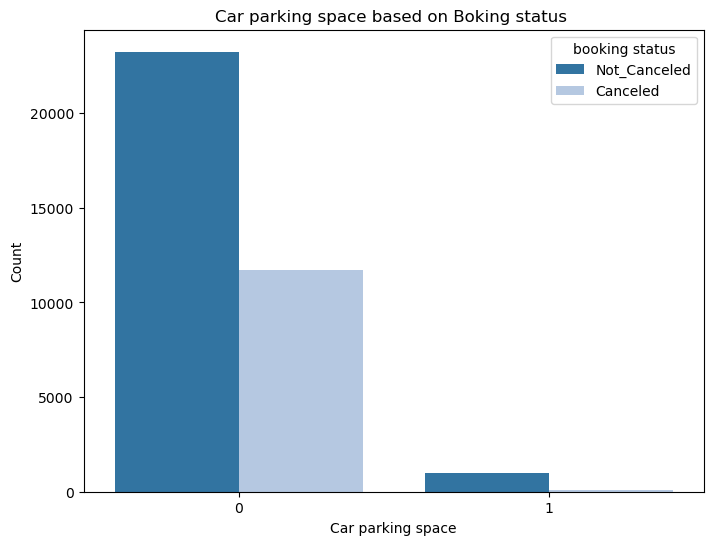

In [69]:
#A count plot for showing the relationship between car parking space and booking status
plt.figure(figsize=(8, 6))
sns.set_palette("tab20")
sns.countplot(data=df, x=df["car parking space"], hue=df["booking status"])
plt.title("Car parking space based on Boking status ")
plt.xlabel("Car parking space")
plt.ylabel("Count")
plt.show()

<code style="color: green;">About half of the people who do not have car parking in their reservation cancel their reservation.
</code><br>


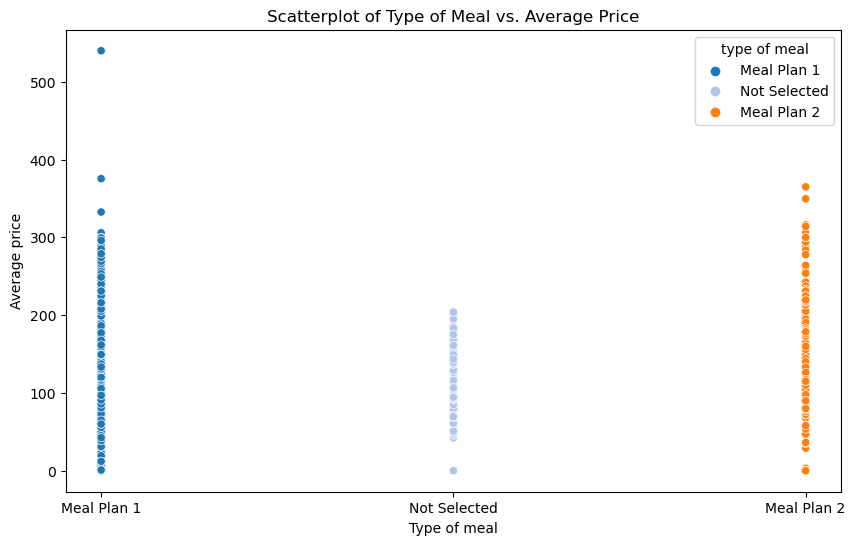

In [70]:
#A Scatter plot for showing the points between type of meal space and average price
plt.figure(figsize=(10, 6))
sns.set_palette("tab20")
sns.scatterplot(data=df, x="type of meal", y="average price", hue="type of meal")
plt.title("Scatterplot of Type of Meal vs. Average Price")
plt.xlabel("Type of meal")
plt.ylabel("Average price")
plt.show()

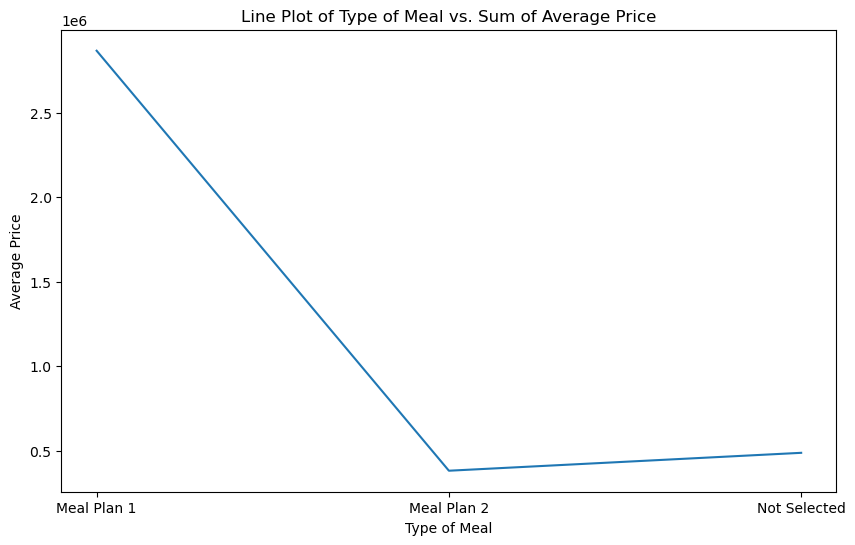

In [71]:
# Group by "type of meal" and calculate the sum of "average price" for each group
df_grouped = df.groupby("type of meal")["average price"].sum().reset_index()
#A Scatter plot for showing the points between type of meal space and average price
plt.figure(figsize=(10, 6))
sns.set_palette("tab20")
fig = sns.lineplot(df_grouped, x="type of meal", y="average price", markers=True)
plt.title("Line Plot of Type of Meal vs. Sum of Average Price")
plt.xlabel("Type of Meal")
plt.ylabel("Average Price")
plt.show()


<code style="color: green;">Meal plan 1 was the most chosen by people.</code>


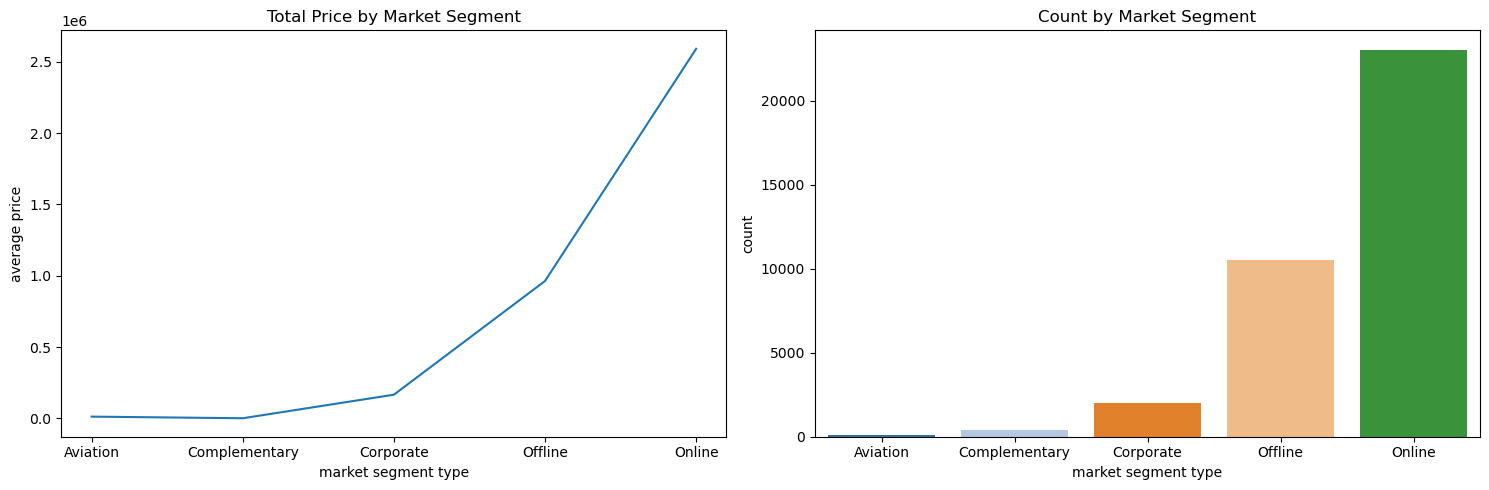

In [72]:
# Group by "market segment type" and calculate the count of data points for each group
df_grouped_count = df.groupby("market segment type").size().reset_index(name="count")

# Create a 1x2 grid of subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Create a bar plot for the count data
sns.barplot(data=df_grouped_count, x="market segment type", y="count", ax=ax[1])
ax[1].set_title('Count by Market Segment')

# Group by "type of meal" and calculate the sum of "average price" for each group
df_grouped_sum = df.groupby("market segment type")["average price"].sum().reset_index()

# Continue with the line plot for the sum data
sns.lineplot(data=df_grouped_sum, x="market segment type", y="average price", ax=ax[0])
ax[0].set_title('Total Price by Market Segment')

plt.tight_layout()

plt.show()




<code style="color: green;">Apparently, the online methodology is the most profitable and used manner for booking.</code><br>


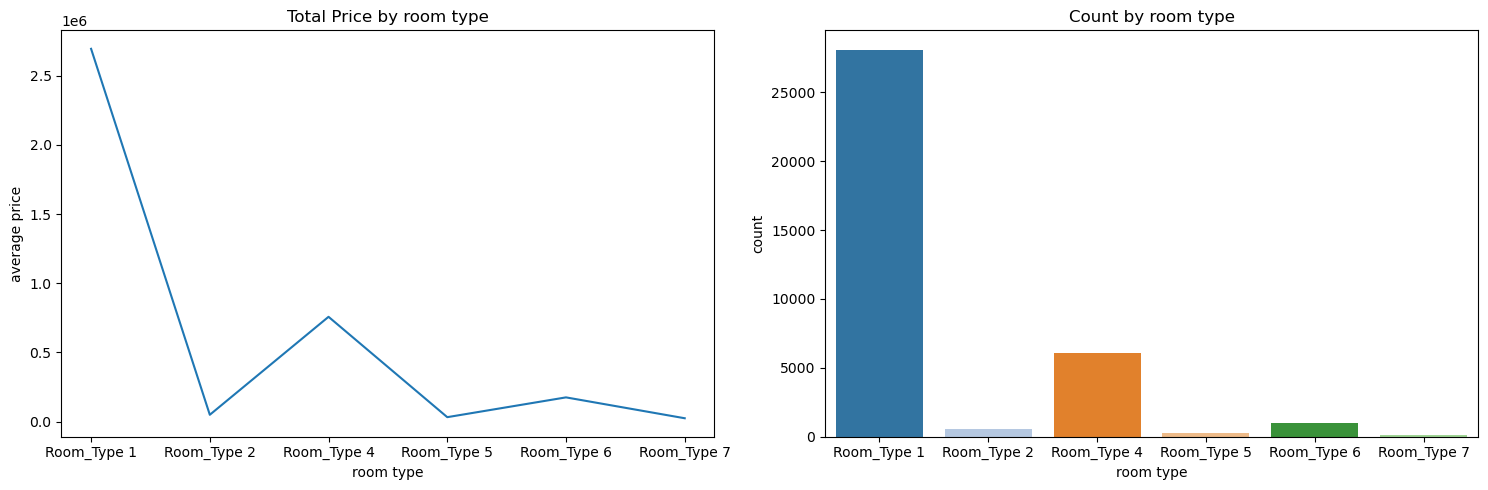

In [73]:
# Group by "room type" and calculate the count of data points for each group
df_grouped_count = df.groupby("room type").size().reset_index(name="count")

# Create a 1x2 grid of subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Create a bar plot for the count data
sns.barplot(data=df_grouped_count, x="room type", y="count", ax=ax[1])
ax[1].set_title('Count by room type')

# Group by "room type" and calculate the sum of "average price" for each group
df_grouped_sum = df.groupby("room type")["average price"].sum().reset_index()

# Continue with the line plot for the sum data
sns.lineplot(data=df_grouped_sum, x="room type", y="average price", ax=ax[0])
ax[0].set_title('Total Price by room type')

plt.tight_layout()

plt.show()


<code style="color: green;">Room type 1 was the mostprofitable and used manner for booking.
</code><br>


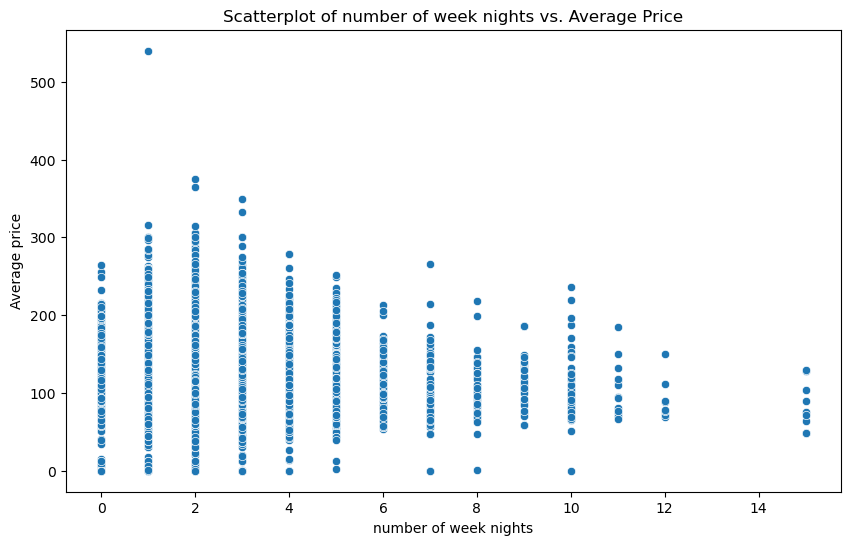

In [74]:
plt.figure(figsize=(10, 6))
sns.set_palette("tab20")
sns.scatterplot(data=df, x="number of week nights", y="average price")
plt.title("Scatterplot of number of week nights vs. Average Price")
plt.xlabel("number of week nights")
plt.ylabel("Average price")
plt.show()

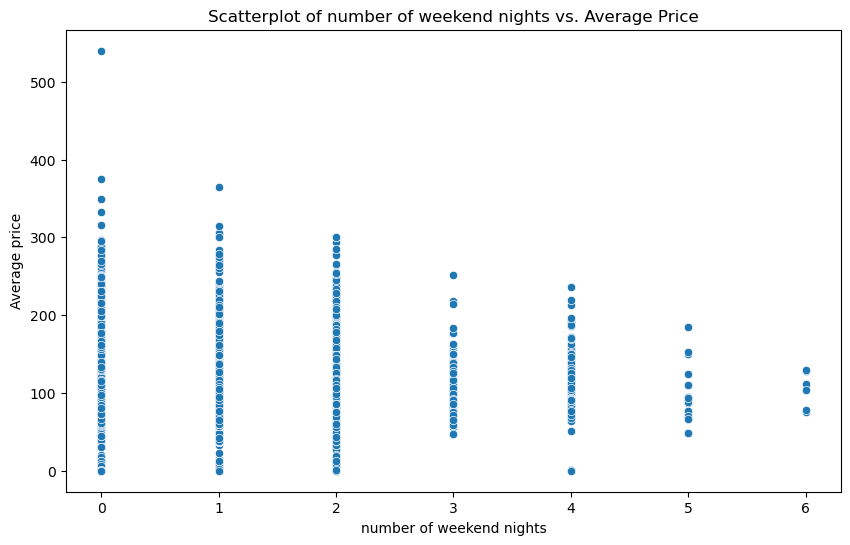

In [75]:
plt.figure(figsize=(10, 6))
sns.set_palette("tab20")
sns.scatterplot(data=df, x="number of weekend nights", y="average price")
plt.title("Scatterplot of number of weekend nights vs. Average Price")
plt.xlabel("number of weekend nights")
plt.ylabel("Average price")
plt.show()


<code style="color: green;">from last 2 figure, I think that as the days increase, the cost per night decreases</code><br>
<code style="color: green;">and price in weekend is more expensive</code><br>

## Handling outliers

In [76]:
for column in df[["number of adults","number of children","number of weekend nights","number of week nights","car parking space","lead time","repeated","P-C","P-not-C","average price","special requests"]]:

    # Calculate the first quartile (Q1) and third quartile (Q3)
    q1, q3 = np.percentile(df[column], [25, 75])

    # Calculate the interquartile range (IQR)
    iqr = q3 - q1

    # Set the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Replace outliers with the median value (Q2)
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), np.median(df[column]), df[column])

In [79]:
# Export to csv
df.to_csv('ml_data.csv', index = False)